# Step 0: Data preprocessing
---
In this step, we preprocess data from historical data or data generation.

### 1. Import the Necessary Packages

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy
from cycler import cycler

# # Set up matplotlib and seaborn styles
# plt.style.use('bmh')
# mpl.rcParams['axes.prop_cycle'] = cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

np.random.seed(0)  # For reproducibility

In [3]:
df_original_data = pd.read_csv('../data/data.csv')
df_original_data.reset_index(inplace=True, drop=True)
df_original_data

,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.90,3.42,3.81,4.58,3.56,4.25,3.86,3.53,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,F1472871E1AFF49D4289564B6377D76C,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.25,3.56,3.38,4.39,3.72,3.77,3.96,3.64,3.40,4.38
42368,F3C8BBCD2DC26C1E0249DEEF6A4256B7,0,2.70,4.39,3.95,0.00,0.00,0.00,0.00,0.00,...,4.81,4.87,4.48,3.67,3.31,4.58,3.33,3.19,4.57,4.00
42369,A9A0FE83467A680FBFB0DBFC910DF227,0,0.58,0.84,1.61,0.90,0.60,0.82,0.89,0.03,...,NaN,0.66,2.92,2.36,3.86,4.28,3.37,6.67,2.44,1.15
42370,D9A6ADA018FA46A55D5438370456AA45,0,16.89,13.84,13.50,14.60,14.46,12.34,15.37,17.01,...,21.13,13.75,22.61,18.83,25.52,18.11,19.31,17.48,17.20,15.28


In [4]:
df_original_data.isnull().sum().sum()

11233528

In [5]:
(df_original_data['FLAG'] == 0).sum(), (df_original_data['FLAG'] == 1).sum()

(38757, 3615)

In [6]:
(df_original_data['FLAG'] == 0).sum() / 42372, (df_original_data['FLAG'] == 1).sum() / 42372

(0.914684225431889, 0.08531577456811101)

In [7]:
df = pd.read_csv('../data/new_clean_data2.csv')
df = df.drop(['Unnamed: 0'], axis=1)   #axis 1 column ,axis 0 row
df

,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
2,2.90,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,3.42,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
3,0.11,0.11,0.25,0.27,0.21,0.20,0.14,0.34,0.23,0.53,...,1.85,3.36,1.45,2.12,1.55,1.18,1.13,1.34,1.26,1.40
4,0.91,1.16,0.75,1.30,0.74,0.94,0.85,1.21,1.17,0.86,...,3.55,3.22,3.06,3.97,2.79,3.82,2.75,2.96,3.67,2.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31678,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.59,0.95,0.39,0.86,0.60,0.82,0.65,0.53,0.77,0.56
31679,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.27,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54
31680,2.70,0.00,0.00,5.72,6.05,5.81,3.07,4.04,5.68,4.39,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
31681,0.58,1.16,0.92,0.98,1.54,1.38,0.89,0.70,1.23,0.84,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65


In [8]:
data_thief_1 = df.loc[2].iloc[2:].values
data_thief_2 = df.loc[3].iloc[2:].values
data_thief_3 = df.loc[4].iloc[2:].values

data_normal_1 = df.loc[31640].iloc[2:].values
data_normal_2 = df.loc[31656].iloc[2:].values
data_normal_3 = df.loc[31675].iloc[2:].values

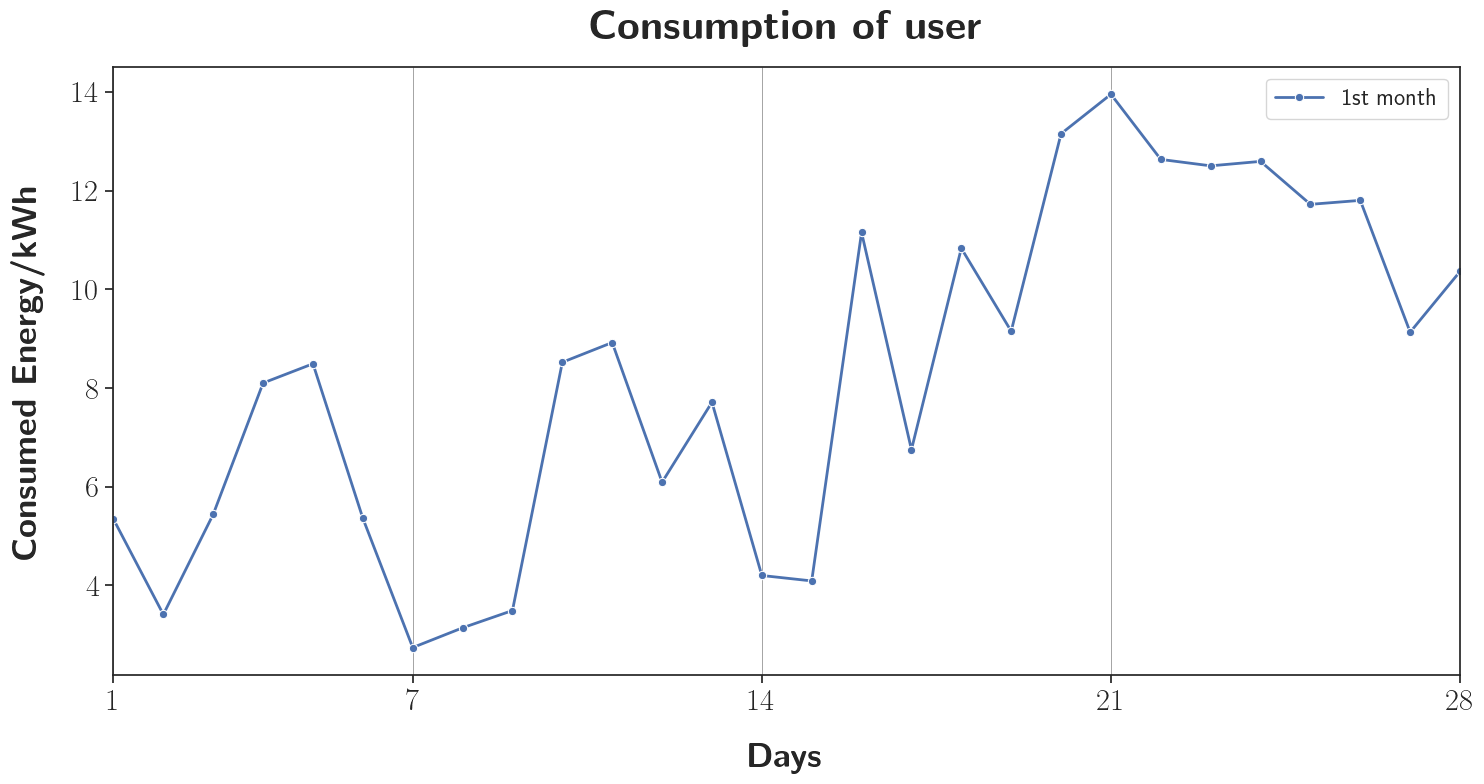

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

mpl.rcParams.update(mpl.rcParamsDefault)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif"
})

sns.set_theme(style="ticks")

# Create a figure with 1 subplot
fig, ax = plt.subplots(figsize=(15, 8))

# Assuming df is your DataFrame and you want to visualize specific rows
days = 28
users = 1

# 29539 21100
# 27074 30 ngày


# Create a new DataFrame for the selected data
# data = pd.DataFrame({
#     'Day': list(range(1, 29)) * len(rows),
#     'Value': flat_values,
#     'Residentals': np.array([["1st month" for _ in range(28)], ["2nd month" for _ in range(28)], ["3rd month" for _ in range(28)], ["4th month" for _ in range(28)]]).flatten().tolist()
# })

# Create a new DataFrame for the selected data
day_range = list(range(1, days + 1)) * users

# 12290 28 ngày

rows = [df.iloc[12290, 0+days*i:days*i+days] for i in range(0, users)]

# Flatten the list of rows
flat_values = np.array(rows).flatten()

# Create a new DataFrame for the selected data
data = pd.DataFrame({
    'Day': day_range,
    'Value': flat_values,
    'Residentals': np.array([f"{i+1}st month" if i == 0 else f"{i+1}th month" for i in range(users) for _ in range(days)]).flatten().tolist()
})


# Create the lineplot
sns.lineplot(x='Day', y='Value', hue='Residentals', data=data, linewidth=2, marker='o', ax=ax)
ax.set_title(r'\textbf{Consumption of user}', fontsize=30, pad=20)
ax.set_xlabel(r'\textbf{Days}', fontsize=25, labelpad=20)
ax.set_ylabel(r'\textbf{Consumed Energy/kWh}', fontsize=25, labelpad=20)
ax.set_xticks([0, 1, 7, 14, 21, 28])
ax.tick_params(axis='both', which='major', labelsize=22) 
ax.grid(True, which='both', axis='x', color='gray', linewidth=0.5)
ax.set_xlim(1, days)
ax.legend(fontsize='x-large')  # Change font size of legend

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data
data_imbalanced = {'Class': [0]*flag[flag['FLAG'] == 0].shape[0] + [1]*flag[flag['FLAG'] == 1].shape[0]}
count_zero = np.count_nonzero(y_resampled == 0)
data_balanced = {'Class': [0]*count_zero + [1]*(len(y_resampled) - count_zero)}


df_imbalanced = pd.DataFrame(data_imbalanced)
df_balanced = pd.DataFrame(data_balanced)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Imbalanced dataset plot
sns.countplot(x='Class', data=df_imbalanced, ax=axs[0], palette='deep')
axs[0].set_title(r'\textbf{Imbalanced Dataset}', fontsize=16)
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].tick_params(axis='both', labelsize=15)
axs[0].set_ylim(0, 32000)

# Add count values on top of each bar
for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x()+p.get_width()/2., height + 0.1*8000, r'\textbf{{{}}}'.format(int(height)), ha="center", fontsize=15) 

# Balanced dataset plot
sns.countplot(x='Class', data=df_balanced, ax=axs[1], palette='deep')
axs[1].set_title(r'\textbf{Balanced Dataset (K-mean SMOTE)}', fontsize=16)
axs[1].set_xlabel('')
axs[1].set_ylabel('')
axs[1].tick_params(axis='both', labelsize=15)

# Add count values on top of each bar
for p in axs[1].patches:
    height = p.get_height()
    axs[1].text(p.get_x()+p.get_width()/2., height + 0.1*8000, r'\textbf{{{}}}'.format(int(height)), ha="center", fontsize=15) 

plt.tight_layout()
plt.show()

In [12]:
data = df.drop(['CONS_NO', 'FLAG'], axis=1)   #axis 1 column ,axis 0 row
data

,2014-01-01 00:00:00,2014-01-02 00:00:00,2014-01-03 00:00:00,2014-01-04 00:00:00,2014-01-05 00:00:00,2014-01-06 00:00:00,2014-01-07 00:00:00,2014-01-08 00:00:00,2014-01-09 00:00:00,2014-01-10 00:00:00,...,2016-10-22 00:00:00,2016-10-23 00:00:00,2016-10-24 00:00:00,2016-10-25 00:00:00,2016-10-26 00:00:00,2016-10-27 00:00:00,2016-10-28 00:00:00,2016-10-29 00:00:00,2016-10-30 00:00:00,2016-10-31 00:00:00
0,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
2,2.90,5.640000,6.990000,3.32,3.61,5.35,4.73,3.68,3.53,3.42,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
3,0.11,0.110000,0.250000,0.27,0.21,0.20,0.14,0.34,0.23,0.53,...,1.85,3.36,1.45,2.12,1.55,1.18,1.13,1.34,1.26,1.40
4,0.91,1.160000,0.750000,1.30,0.74,0.94,0.85,1.21,1.17,0.86,...,3.55,3.22,3.06,3.97,2.79,3.82,2.75,2.96,3.67,2.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31678,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.59,0.95,0.39,0.86,0.60,0.82,0.65,0.53,0.77,0.56
31679,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.27,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54
31680,2.70,0.809443,0.809443,5.72,6.05,5.81,3.07,4.04,5.68,4.39,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
31681,0.58,1.160000,0.920000,0.98,1.54,1.38,0.89,0.70,1.23,0.84,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65


In [10]:
df.iloc[31670]

2014-01-01    2.03
2014-01-02    2.82
2014-01-03    1.93
2014-01-04    2.13
2014-01-05    1.81
              ... 
2016-10-27    2.29
2016-10-28    2.22
2016-10-29    2.34
2016-10-30    2.52
2016-10-31    1.84
Name: 31670, Length: 1034, dtype: float64

In [11]:
df.iloc[31670]

2014-01-01    2.03
2014-01-02    2.82
2014-01-03    1.93
2014-01-04    2.13
2014-01-05    1.81
              ... 
2016-10-27    2.29
2016-10-28    2.22
2016-10-29    2.34
2016-10-30    2.52
2016-10-31    1.84
Name: 31670, Length: 1034, dtype: float64

In [155]:
len(pd.date_range(start = '2014-01-01 00:00:00', end = '2014-01-06 00:00:00', freq='D'))

6

In [156]:
pd.date_range(start = '2014-01-01 00:00:00', end = '2015-06-01 00:00:00', freq='D')

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2015-05-23', '2015-05-24', '2015-05-25', '2015-05-26',
               '2015-05-27', '2015-05-28', '2015-05-29', '2015-05-30',
               '2015-05-31', '2015-06-01'],
              dtype='datetime64[ns]', length=517, freq='D')

In [157]:
len(pd.date_range(start = '2014-01-01 00:00:00', end = '2015-06-01 00:00:00', freq='D'))

517

In [158]:
pd.date_range(start = '2015-06-15 00:00:00', end = '2015-07-12 00:00:00', freq='D')

DatetimeIndex(['2015-06-15', '2015-06-16', '2015-06-17', '2015-06-18',
               '2015-06-19', '2015-06-20', '2015-06-21', '2015-06-22',
               '2015-06-23', '2015-06-24', '2015-06-25', '2015-06-26',
               '2015-06-27', '2015-06-28', '2015-06-29', '2015-06-30',
               '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10', '2015-07-11', '2015-07-12'],
              dtype='datetime64[ns]', freq='D')

In [159]:
data.loc['2015-06-15 00:00:00':'2015-07-12 00:00:00']

,2014-01-01 00:00:00,2014-01-02 00:00:00,2014-01-03 00:00:00,2014-01-04 00:00:00,2014-01-05 00:00:00,2014-01-06 00:00:00,2014-01-07 00:00:00,2014-01-08 00:00:00,2014-01-09 00:00:00,2014-01-10 00:00:00,...,2016-10-22 00:00:00,2016-10-23 00:00:00,2016-10-24 00:00:00,2016-10-25 00:00:00,2016-10-26 00:00:00,2016-10-27 00:00:00,2016-10-28 00:00:00,2016-10-29 00:00:00,2016-10-30 00:00:00,2016-10-31 00:00:00


In [160]:
count_0 = (df['FLAG'] == 0).sum()
count_1 = (df['FLAG'] == 1).sum()
count_0, count_1

(29151, 2532)

In [161]:
df.loc[2]['FLAG'], df.loc[3]['FLAG'], df.loc[4]['FLAG']

(1, 1, 1)

In [162]:
df.loc[31680]['FLAG'], df.loc[31681]['FLAG'], df.loc[31682]['FLAG']

(0, 0, 0)

In [163]:
df.loc[3].iloc[2:]

2014-01-01 00:00:00    0.11
2014-01-02 00:00:00    0.11
2014-01-03 00:00:00    0.25
2014-01-04 00:00:00    0.27
2014-01-05 00:00:00    0.21
                       ... 
2016-10-27 00:00:00    1.18
2016-10-28 00:00:00    1.13
2016-10-29 00:00:00    1.34
2016-10-30 00:00:00    1.26
2016-10-31 00:00:00     1.4
Name: 3, Length: 1034, dtype: object

In [9]:
data_thief_1 = df.loc[2].iloc[2:].values
data_thief_2 = df.loc[3].iloc[2:].values
data_thief_3 = df.loc[4].iloc[2:].values

data_normal_1 = df.loc[31640].iloc[2:].values
data_normal_2 = df.loc[31656].iloc[2:].values
data_normal_3 = df.loc[31675].iloc[2:].values

In [214]:
# #noramalisation process
# scale = MinMaxScaler()
# scaled = scale.fit_transform(data.values.T).T
# mData = pd.DataFrame(data=scaled, columns=data.columns)
# preprData = pd.concat([infoData, mData], axis=1, sort=False)  # Back to initial format
# #print("Noramalised data")
# #print(preprData)

# # save preprocessed data after scaling
# preprData.to_csv(r'preprocessedR.csv', index=False, header=True)


In [10]:
data_thief_1

array([ 6.99,  3.32,  3.61, ..., 10.89,  9.86,  8.72])

In [32]:
cleaned_df = pd.read_csv('../data/new_clean_data2.csv')
cleaned_df.drop(['Unnamed: 0'], axis=1, inplace=True)
cleaned_df

flag = pd.read_csv('../data/new_info2.csv')
flag.drop(['Unnamed: 0'], axis=1, inplace=True)
flag

df_combined = pd.concat([flag, cleaned_df], axis=1)
df_combined

sampling_df = df_combined.copy(deep=True)

In [11]:
mpl.rcParams.update(mpl.rcParamsDefault)

plt.rcParams.update({
    "text.usetex": True,
    "font.weight": "bold"
})

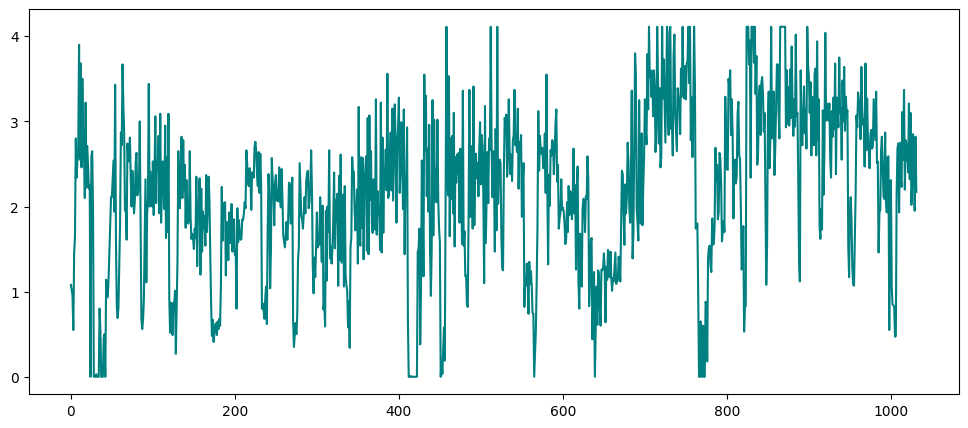

In [9]:
import matplotlib.pyplot as plt

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 5))

# Plot the data on each axis
sns.lineplot(data=data_normal_2, ax=ax, color='teal')

# ax.set_title(r'\textbf{Theft user 1}', fontsize=20)
# ax.set_xlabel('Days', fontsize=17)
# ax.set_ylabel('Consumed Energy', fontsize=17)

# Show the figure
plt.show()

/tmp/ipykernel_3838155/3648225503.py:36: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x=X_res[:, 0], y=X_res[:, 1], hue=y_res, palette=['red', 'black', 'green'], style=y_res, markers=['X', 'o', '+'])
/tmp/ipykernel_3838155/3648225503.py:36: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x=X_res[:, 0], y=X_res[:, 1], hue=y_res, palette=['red', 'black', 'green'], style=y_res, markers=['X', 'o', '+'])


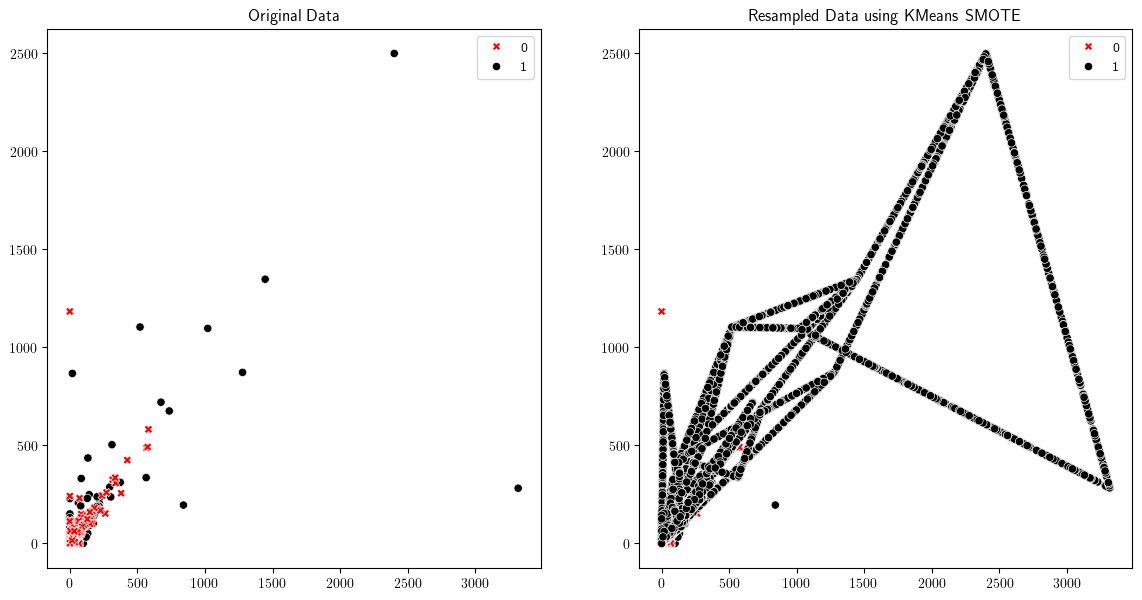

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from imblearn.over_sampling import KMeansSMOTE
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import RandomUnderSampler


# Separate features and target
X = sampling_df.iloc[:, 2:].values
y = sampling_df.iloc[:, 0].values

# Apply KMeans SMOTE with adjusted parameters
kmeans_smote = KMeansSMOTE(kmeans_estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=42)
X_res, y_res = kmeans_smote.fit_resample(X, y)

undersampler = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
X_res, y_res = undersampler.fit_resample(X_res, y_res)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_res_pca = pca.fit_transform(X_res)

# Plotting Functions
def plot_resampled_data(X_original, y_original, X_res, y_res):
    plt.figure(figsize=(14, 7))
    
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=X_original[:, 0], y=X_original[:, 1], hue=y_original, palette=['red', 'black'], style=y_original, markers=['X', 'o'])
    plt.title('Original Data')
    
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=X_res[:, 0], y=X_res[:, 1], hue=y_res, palette=['red', 'black', 'green'], style=y_res, markers=['X', 'o', '+'])
    plt.title('Resampled Data using KMeans SMOTE')
    
    plt.show()

# Plot original and resampled data
plot_resampled_data(X, y, X_res, y_res)

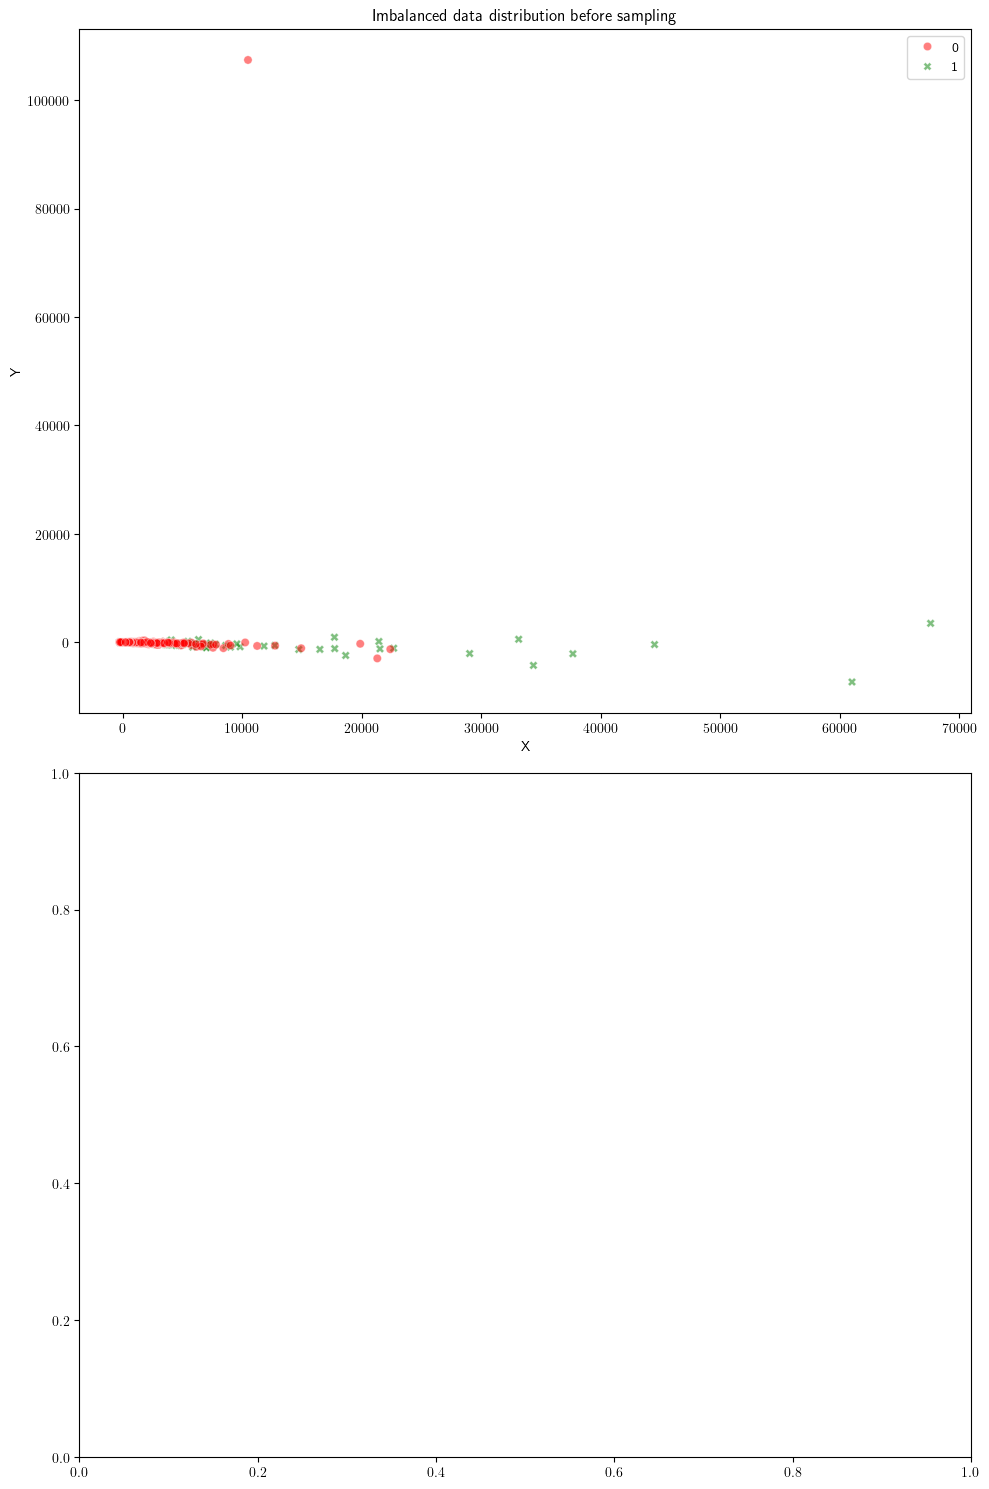

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from imblearn.over_sampling import KMeansSMOTE
from sklearn.cluster import MiniBatchKMeans

# Assuming `sampling_df` is your DataFrame
# For demonstration, I'll create a random DataFrame
# np.random.seed(42)
# sampling_df = pd.DataFrame(np.random.randn(31683, 1034))

# Separate features and target
X = sampling_df.iloc[:, 2:].values
y = sampling_df.iloc[:, 0].values

# Apply KMeans SMOTE with adjusted parameters
kmeans_smote = KMeansSMOTE(kmeans_estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=42)
X_res, y_res = kmeans_smote.fit_resample(X, y)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_res_pca = pca.fit_transform(X_res)

# Plotting Functions
def plot_resampled_data(X_original, y_original, X_res, y_res):
    fig, axes = plt.subplots(2, 1, figsize=(10, 15))
    
    # Plot original data
    sns.scatterplot(x=X_original[:, 0], y=X_original[:, 1], hue=y_original, palette=['red', 'green'], style=y_original, markers=['o', 'X'], ax=axes[0], alpha=0.5)
    axes[0].set_title('Imbalanced data distribution before sampling')
    # axes[0].set_xlim(0, 500)
    # axes[0].set_ylim(0, 500)
    axes[0].set_xlabel('X')
    axes[0].set_ylabel('Y')
    
    # Plot resampled data
    # sns.scatterplot(x=X_res[:, 1033], y=X_res[:, 0], hue=y_res, palette=['red', 'green'], style=y_res, markers=['o', 'X'], ax=axes[1])
    # axes[1].set_title('Data distribution after KMeans SMOTE')
    # axes[1].set_xlim(0, 500)
    # axes[1].set_ylim(0, 500)
    # axes[1].set_xlabel('X')
    # axes[1].set_ylabel('Y')
    
    plt.tight_layout()
    plt.show()

# Plot original and resampled data
plot_resampled_data(X_pca, y, X_res, y_res)

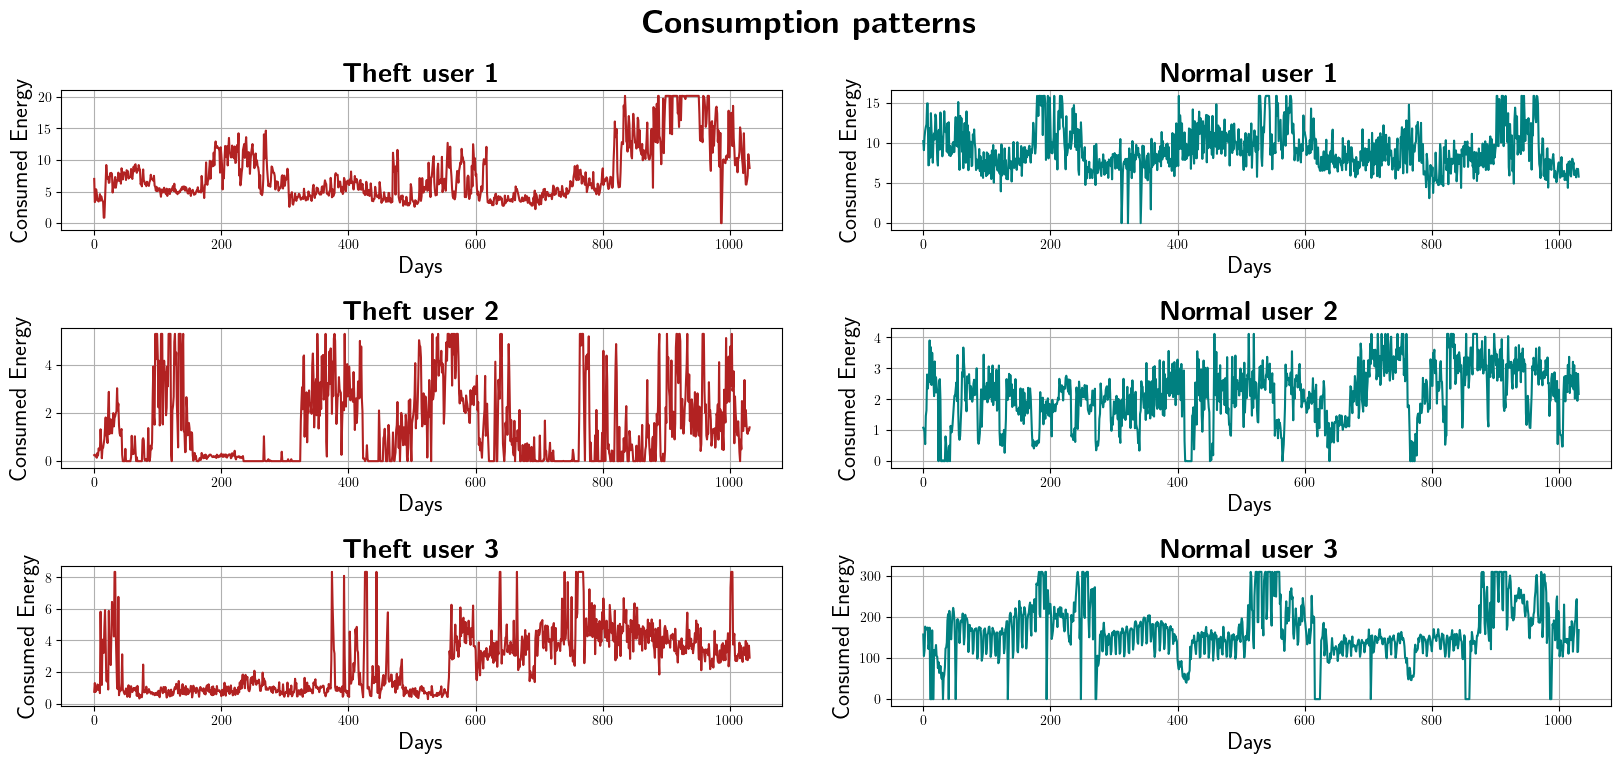

In [17]:
# Create a new figure
fig = plt.figure(figsize=(20, 8))

# Add axes to the figure
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(323)
ax3 = fig.add_subplot(325)
ax4 = fig.add_subplot(322)
ax5 = fig.add_subplot(324)
ax6 = fig.add_subplot(326)

# Set the spacing between the subplots
plt.subplots_adjust(hspace=0.7, wspace=0.15)

fig.suptitle(r'\textbf{Consumption patterns}', fontsize=24)

# Plot the data on each axis
sns.lineplot(data=data_thief_1, ax=ax1, color='firebrick')
ax1.set_title(r'\textbf{Theft user 1}', fontsize=20)
ax1.set_xlabel('Days', fontsize=17)
ax1.set_ylabel('Consumed Energy', fontsize=17)
ax1.grid(True)

sns.lineplot(data=data_thief_2, ax=ax2, color='firebrick')
ax2.set_title(r'\textbf{Theft user 2}', fontsize=20)
ax2.set_xlabel('Days', fontsize=17)
ax2.set_ylabel('Consumed Energy', fontsize=17, labelpad=10)
ax2.grid(True)

sns.lineplot(data=data_thief_3, ax=ax3, color='firebrick')
ax3.set_title(r'\textbf{Theft user 3}', fontsize=20)
ax3.set_xlabel('Days', fontsize=17)
ax3.set_ylabel('Consumed Energy', fontsize=17)
ax3.grid(True)

# Add three more charts on the right side
sns.lineplot(data=data_normal_1, ax=ax4, color='teal')
ax4.set_title(r'\textbf{Normal user 1}', fontsize=20)
ax4.set_xlabel('Days', fontsize=17)
ax4.set_ylabel('Consumed Energy', fontsize=17)
ax4.grid(True)

sns.lineplot(data=data_normal_2, ax=ax5, color='teal')
ax5.set_title(r'\textbf{Normal user 2}', fontsize=20)
ax5.set_xlabel('Days', fontsize=17)
ax5.set_ylabel('Consumed Energy', fontsize=17, labelpad=10)
ax5.grid(True)

sns.lineplot(data=data_normal_3, ax=ax6, color='teal')
ax6.set_title(r'\textbf{Normal user 3}', fontsize=20)
ax6.set_xlabel('Days', fontsize=17)
ax6.set_ylabel('Consumed Energy', fontsize=17)
ax6.grid(True)

# Show the figure
plt.show()


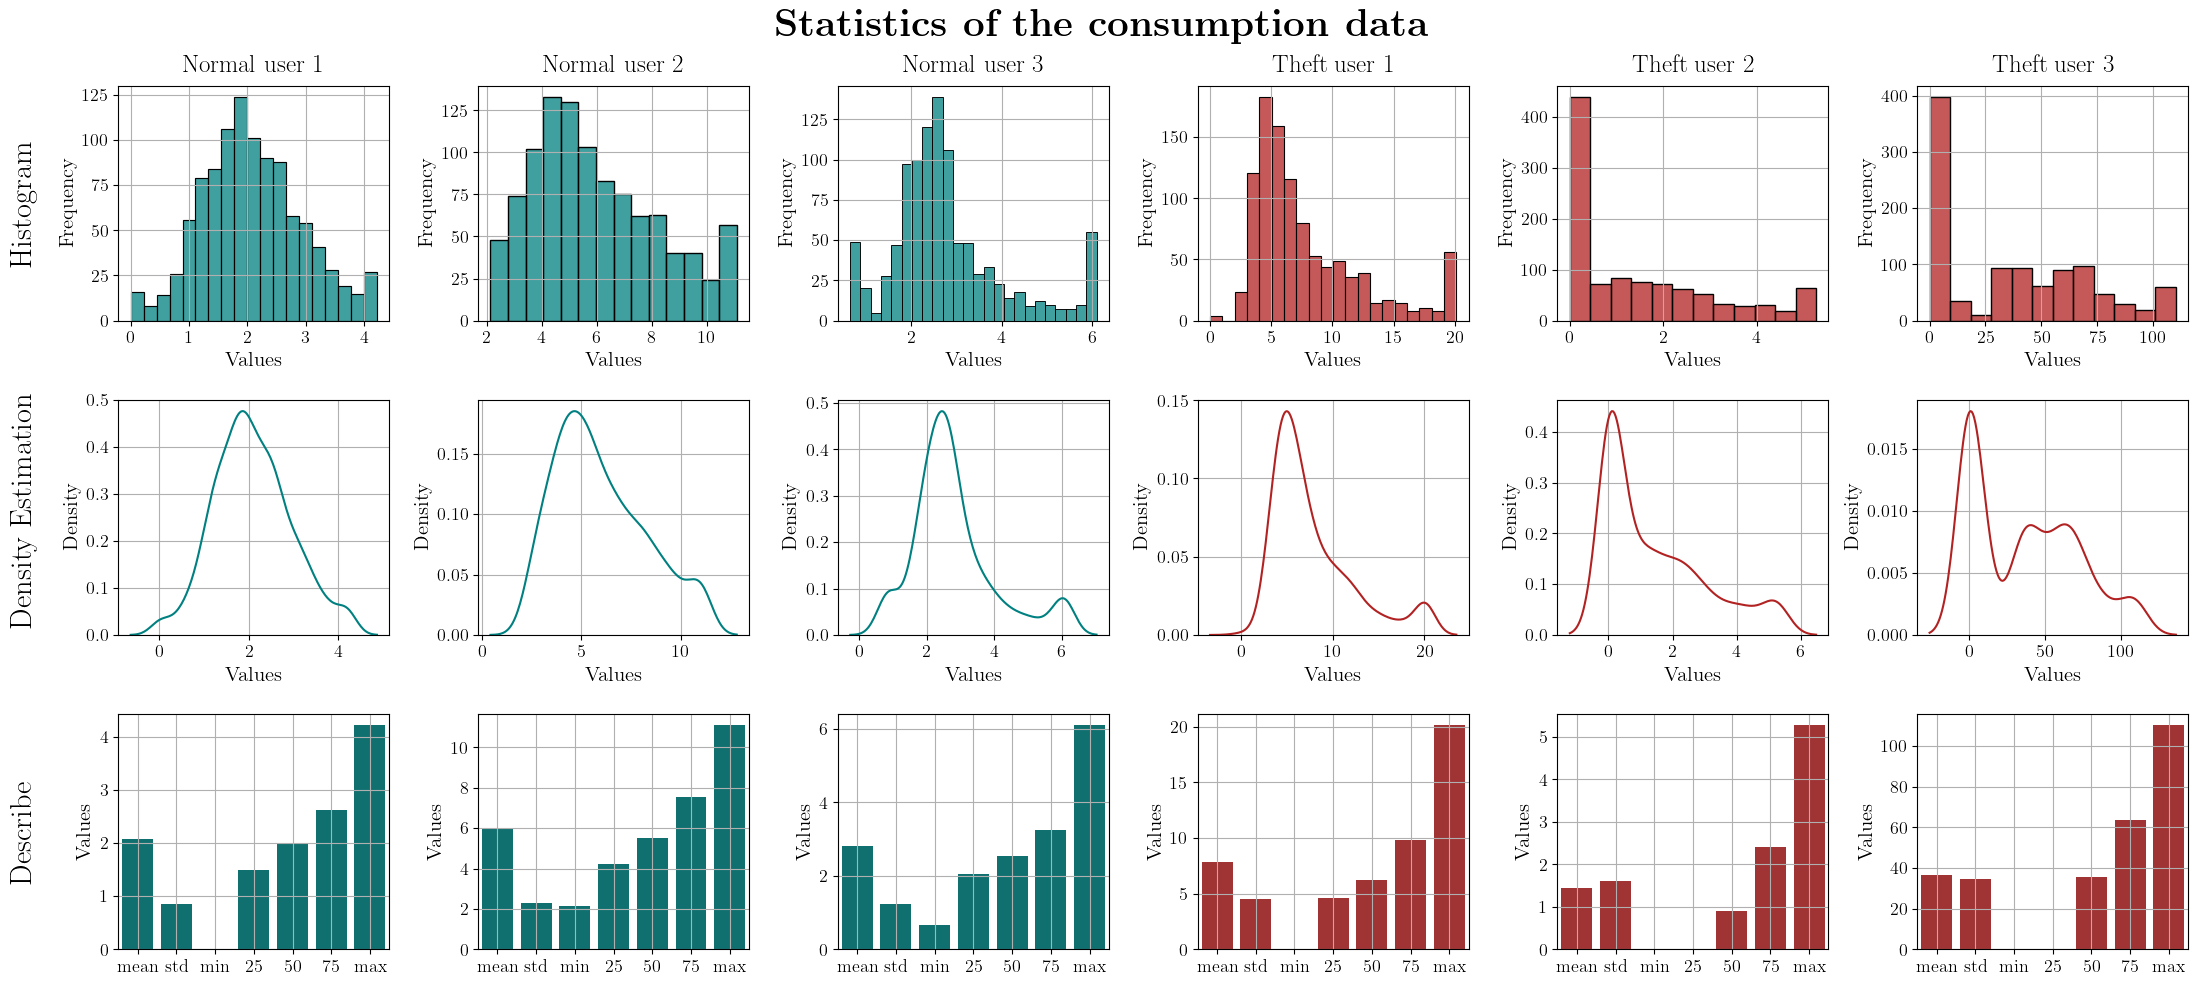

In [15]:
import seaborn as sns
# FILEPATH: /home/tiendat/electric-theft-detection/notebooks/preprocessing - Code 2.ipynb
idx = 2

users = [31630, 31652, 31670, 2, 3, 5]

#statistics for consumer 
# Create a new figure
fig2, axs2 = plt.subplots(3, 6, figsize=(22, 10))

fig2.suptitle(r'\textbf{Statistics of the consumption data}', fontsize=28)
plt.subplots_adjust(wspace=0.2)

for i in range(0, 6):
    color = 'firebrick'
    if i < 3:
        color = 'teal'
    sns.histplot(data=df.loc[users[i]].values, color=color, ax=axs2[0, i])
    axs2[0, i].set_title(f'Normal user {i + 1}', fontsize=18, pad=10)
    if users[i] < 3000:
        axs2[0, i].set_title(f'Theft user {i - 2}', fontsize=18, pad=10)
    axs2[0, i].set_xlabel('Values', fontsize=15)
    axs2[0, i].set_ylabel('Frequency', fontsize=15)
    axs2[0, i].tick_params(axis='x', labelsize=13)
    axs2[0, i].tick_params(axis='y', labelsize=13)
    axs2[0, i].grid(True)

    sns.kdeplot(data=df.loc[users[i]], color=color, ax=axs2[1, i])
    axs2[1, i].set_xlabel('Values', fontsize=15)
    axs2[1, i].set_ylabel('Density', fontsize=15)
    axs2[1, i].tick_params(axis='x', labelsize=13)
    axs2[1, i].tick_params(axis='y', labelsize=13)
    axs2[1, i].grid(True)

    sns.barplot(data=df.loc[users[i]].describe().drop(['count']), color=color, ax=axs2[2, i])
    axs2[2, i].set_ylabel('Values', fontsize=15)
    axs2[2, i].tick_params(axis='x', labelsize=13)
    axs2[2, i].tick_params(axis='y', labelsize=13)
    axs2[2, i].grid(True)
    
    if i == 0:
        axs2[0, i].text(-0.3, 0.25, 'Histogram', transform=axs2[0, i].transAxes, ha='right', rotation=90, fontsize=22)
        axs2[1, i].text(-0.3, 0.05, 'Density Estimation', transform=axs2[1, i].transAxes, ha='right', rotation=90, fontsize=22)
        axs2[2, i].text(-0.3, 0.3, 'Describe', transform=axs2[2, i].transAxes, ha='right', rotation=90, fontsize=22)

    
plt.tight_layout()
plt.show()

In [107]:
idx = 3

#statistics for consumer 
#with fraud
# fig2, axs2 = plt.subplots(2, 2)
fig2, axs2 = plt.subplots(2, 2, figsize=(8, 5))

fig2.suptitle('Statistics for Thief Consumer 2')
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.3)

axs2[0, 0].plot(data.loc[idx].values, ax=[0,0], color='firebrick')
# data.loc[2].plot(ax=axs2[0, 0], color='firebrick', grid=True)
axs2[0, 0].set_title('Consumption')
axs2[0, 0].set_xlabel('Sequence No.')
axs2[0, 0].set_ylabel('Consumption')
axs2[0, 0].grid(True)
# axs2[0, 0].tick_params(axis='x', labelsize='x-small')

# axs2[0, 1].hist(data_thief_1, color='firebrick')
data.loc[idx].hist(color='firebrick', ax=axs2[0, 1], grid=True)
axs2[0, 1].set_title('Histogram')
axs2[0, 1].set_xlabel('Values')
axs2[0, 1].set_ylabel('Frequency')
axs2[0, 1].grid(True)

data.loc[idx].plot.kde(color='firebrick', ax=axs2[1, 0], grid=True)
axs2[1, 0].set_title('Density Estimation')
axs2[1, 0].set_xlabel('Values')
axs2[1, 0].set_ylabel('Density')

data.barplot(kind='bar', ax=axs2[1, 1], color='firebrick', grid=True)
axs2[1, 1].set_title('Statistics')
axs2[1, 1].set_ylabel('Values')

# ax.set_ylabel('Energy (kW)', fontsize='x-small')
# ax.tick_params(axis='x', labelsize='xx-small')
# ax.tick_params(axis='y', labelsize='xx-small')

plt.tight_layout()
fig2.savefig(f"Image/Thief_2.png", dpi=300)

NameError: name 'data' is not defined

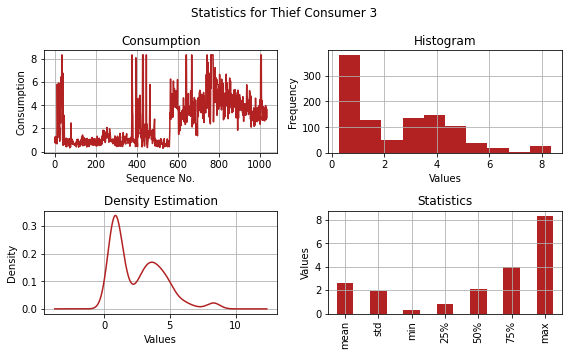

In [219]:
idx = 4

#statistics for consumer 
#with fraud
# fig2, axs2 = plt.subplots(2, 2)
fig2, axs2 = plt.subplots(2, 2, figsize=(8, 5))

fig2.suptitle('Statistics for Thief Consumer 3')
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.3)

axs2[0, 0].plot(data.loc[idx].values, color='firebrick')
# data.loc[2].plot(ax=axs2[0, 0], color='firebrick', grid=True)
axs2[0, 0].set_title('Consumption')
axs2[0, 0].set_xlabel('Sequence No.')
axs2[0, 0].set_ylabel('Consumption')
axs2[0, 0].grid(True)
# axs2[0, 0].tick_params(axis='x', labelsize='x-small')

# axs2[0, 1].hist(data_thief_1, color='firebrick')
data.loc[idx].hist(color='firebrick', ax=axs2[0, 1], grid=True)
axs2[0, 1].set_title('Histogram')
axs2[0, 1].set_xlabel('Values')
axs2[0, 1].set_ylabel('Frequency')
axs2[0, 1].grid(True)

data.loc[idx].plot.kde(color='firebrick', ax=axs2[1, 0], grid=True)
axs2[1, 0].set_title('Density Estimation')
axs2[1, 0].set_xlabel('Values')
axs2[1, 0].set_ylabel('Density')

data.loc[idx].describe().drop(['count']).plot(kind='bar', ax=axs2[1, 1], color='firebrick', grid=True)
axs2[1, 1].set_title('Statistics')
axs2[1, 1].set_ylabel('Values')


# ax.set_ylabel('Energy (kW)', fontsize='x-small')
# ax.tick_params(axis='x', labelsize='xx-small')
# ax.tick_params(axis='y', labelsize='xx-small')

plt.tight_layout()
fig2.savefig(f"Image/Thief_3.png", dpi=300)

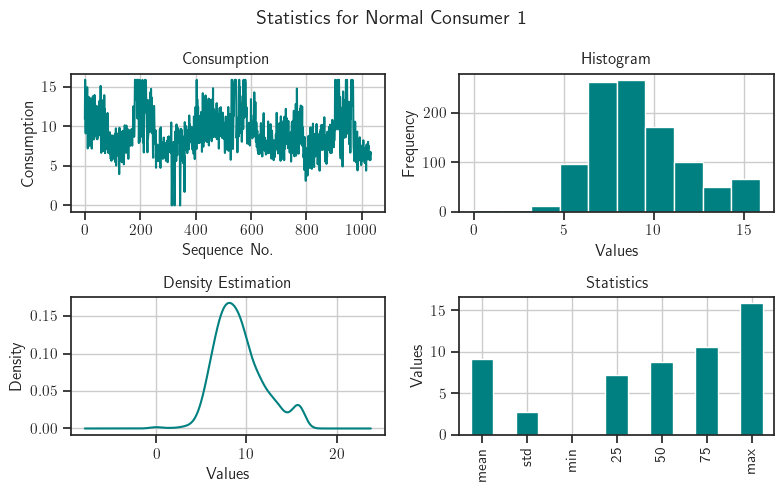

In [139]:
idx = 31640

#without fraud
fig3, axs3 = plt.subplots(2, 2, figsize=(8, 5))

fig3.suptitle('Statistics for Normal Consumer 1')
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.3)

axs3[0, 0].plot(df.loc[idx].values, color='teal')
axs3[0, 0].set_title('Consumption')
axs3[0, 0].set_xlabel('Sequence No.')
axs3[0, 0].set_ylabel('Consumption')
axs3[0, 0].grid(True)

df.loc[idx].hist(color='teal', ax=axs3[0, 1])
axs3[0, 1].set_title('Histogram')
axs3[0, 1].set_xlabel('Values')
axs3[0, 1].set_ylabel('Frequency')

df.loc[idx].plot.kde(color='teal', ax=axs3[1, 0], grid=True)
axs3[1, 0].set_title('Density Estimation')
axs3[1, 0].set_xlabel('Values')
axs3[1, 0].set_ylabel('Density')

df.loc[idx].describe().drop(['count']).plot(kind='bar', ax=axs3[1, 1], color='teal', grid=True)
axs3[1, 1].set_title('Statistics')
axs3[1, 1].set_ylabel('Values')

plt.tight_layout()
plt.show()

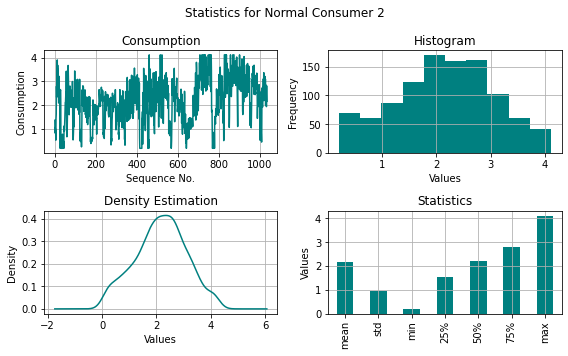

In [221]:
idx = 31656
#without fraud
fig3, axs3 = plt.subplots(2, 2, figsize=(8, 5))

fig3.suptitle('Statistics for Normal Consumer 2')
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.3)

axs3[0, 0].plot(data.loc[idx].values, color='teal')
axs3[0, 0].set_title('Consumption')
axs3[0, 0].set_xlabel('Sequence No.')
axs3[0, 0].set_ylabel('Consumption')
axs3[0, 0].grid(True)

data.loc[idx].hist(color='teal', ax=axs3[0, 1])
axs3[0, 1].set_title('Histogram')
axs3[0, 1].set_xlabel('Values')
axs3[0, 1].set_ylabel('Frequency')

data.loc[idx].plot.kde(color='teal', ax=axs3[1, 0], grid=True)
axs3[1, 0].set_title('Density Estimation')
axs3[1, 0].set_xlabel('Values')
axs3[1, 0].set_ylabel('Density')

data.loc[idx].describe().drop(['count']).plot(kind='bar', ax=axs3[1, 1], color='teal', grid=True)
axs3[1, 1].set_title('Statistics')
axs3[1, 1].set_ylabel('Values')

plt.tight_layout()
fig3.savefig(f"Image/Normal_2.png", dpi=300)

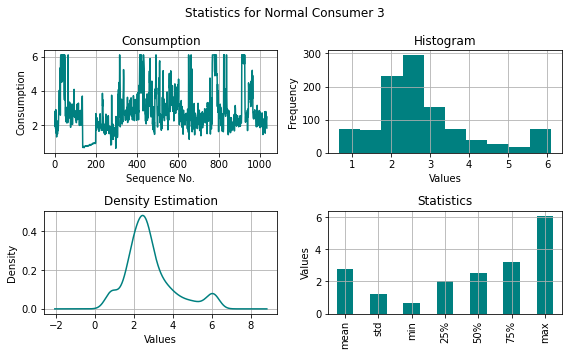

In [222]:
idx = 31670
#without fraud
fig3, axs3 = plt.subplots(2, 2, figsize=(8, 5))

fig3.suptitle('Statistics for Normal Consumer 3')
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.3)

axs3[0, 0].plot(data.loc[idx].values, color='teal')
axs3[0, 0].set_title('Consumption')
axs3[0, 0].set_xlabel('Sequence No.')
axs3[0, 0].set_ylabel('Consumption')
axs3[0, 0].grid(True)

data.loc[idx].hist(color='teal', ax=axs3[0, 1])
axs3[0, 1].set_title('Histogram')
axs3[0, 1].set_xlabel('Values')
axs3[0, 1].set_ylabel('Frequency')

data.loc[idx].plot.kde(color='teal', ax=axs3[1, 0], grid=True)
axs3[1, 0].set_title('Density Estimation')
axs3[1, 0].set_xlabel('Values')
axs3[1, 0].set_ylabel('Density')

data.loc[idx].describe().drop(['count']).plot(kind='bar', ax=axs3[1, 1], color='teal', grid=True)
axs3[1, 1].set_title('Statistics')
axs3[1, 1].set_ylabel('Values')

plt.tight_layout()
fig3.savefig(f"Image/Normal_3.png", dpi=300)

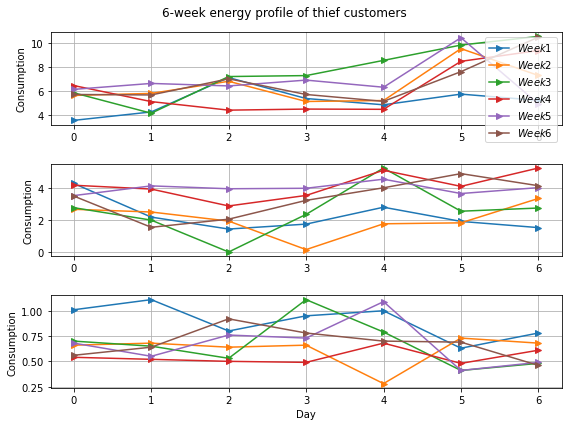

In [223]:
# 2D data plot
fig4, axs4 = plt.subplots(3, 1, figsize=(8, 6))

fig4.suptitle('6-week energy profile of thief customers')
plt.subplots_adjust(hspace=0.5)

idx = 2
for i in range(516, 558, 7):
    axs4[0].plot(data.iloc[idx,i:i + 7].to_numpy(), marker='>', linestyle='-',
                 label='$Week {i}$'.format(i=(i % 516) % 6 + 1))
axs4[0].legend(loc='best')
# axs4[0].set_title('Thief Customer')
axs4[0].set_ylabel('Consumption')
axs4[0].grid(True)

idx = 3
for i in range(516, 558, 7):
    axs4[1].plot(data.iloc[idx,i:i + 7].to_numpy(), marker='>', linestyle='-',
                 label='$Week {i}$'.format(i=(i % 516) % 6 + 1))
# axs4[1].legend(loc='best')
# axs4[1].set_title('Normal Customer' )
axs4[1].set_ylabel('Consumption')
axs4[1].grid(True)

idx = 4
for i in range(516, 558, 7):
    axs4[2].plot(data.iloc[idx,i:i + 7].to_numpy(), marker='>', linestyle='-',
                 label='$Week {i}$'.format(i=(i % 516) % 6 + 1))
# axs4[1].legend(loc='best')
# axs4[1].set_title('Normal Customer' )
axs4[2].set_xlabel('Day')
axs4[2].set_ylabel('Consumption')
axs4[2].grid(True)

plt.tight_layout()
fig4.savefig(f"Image/6-week energy profile of thief customers.png", dpi=300)

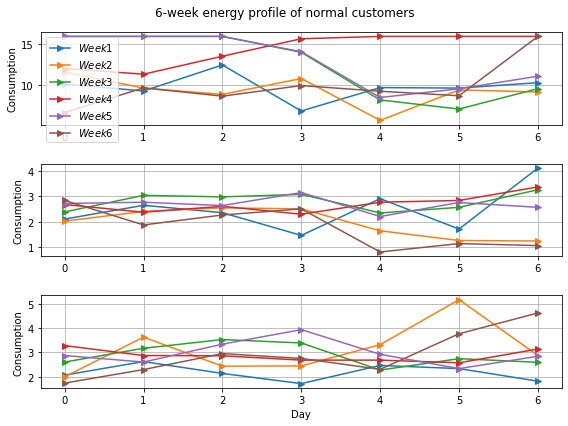

In [224]:
# 2D data plot 
fig4, axs4 = plt.subplots(3, 1, figsize=(8, 6))

fig4.suptitle('6-week energy profile of normal customers')
plt.subplots_adjust(hspace=0.5)

idx = 31640
for i in range(516, 558, 7):
    axs4[0].plot(data.iloc[idx,i:i + 7].to_numpy(), marker='>', linestyle='-',
                 label='$Week {i}$'.format(i=(i % 516) % 6 + 1))
axs4[0].legend(loc='best')
# axs4[0].set_title('Thief Customer')
axs4[0].set_ylabel('Consumption')
axs4[0].grid(True)

idx = 31656
for i in range(516, 558, 7):
    axs4[1].plot(data.iloc[idx,i:i + 7].to_numpy(), marker='>', linestyle='-',
                 label='$Week {i}$'.format(i=(i % 516) % 6 + 1))
#xs4[1].legend(loc='best')
# axs4[1].set_title('Normal Customer' )
axs4[1].set_ylabel('Consumption')
axs4[1].grid(True)

idx = 31670
for i in range(516, 558, 7):
    axs4[2].plot(data.iloc[idx,i:i + 7].to_numpy(), marker='>', linestyle='-',
                 label='$Week {i}$'.format(i=(i % 516) % 6 + 1))
#xs4[1].legend(loc='best')
# axs4[1].set_title('Normal Customer' )
axs4[2].set_xlabel('Day')
axs4[2].set_ylabel('Consumption')
axs4[2].grid(True)

plt.tight_layout()
fig4.savefig(f"Image/6-week energy profile of normal customers.png", dpi=300)

<ipython-input-235-e250cfaa9d72>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs5[0].set_xticklabels([''] + alpha)
<ipython-input-235-e250cfaa9d72>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs5[0].set_yticklabels([''] + alpha)
<ipython-input-235-e250cfaa9d72>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs5[1].set_xticklabels([''] + alpha)
<ipython-input-235-e250cfaa9d72>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs5[1].set_yticklabels([''] + alpha)
<ipython-input-235-e250cfaa9d72>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs5[2].set_xticklabels([''] + alpha)
<ipython-input-235-e250cfaa9d72>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs5[2].set_yticklabels([''] + alpha)


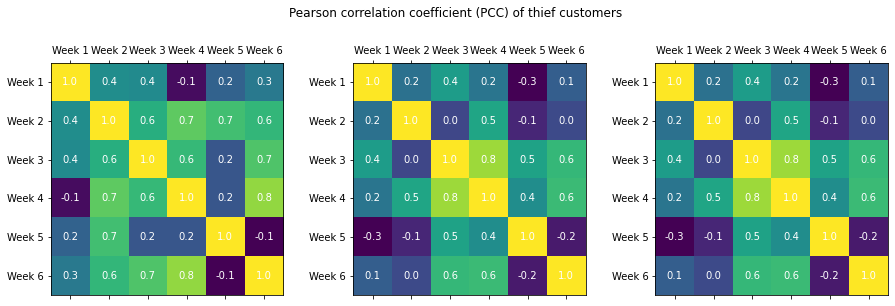

<Figure size 432x288 with 0 Axes>

In [235]:
# 2D data plot 
fig5, axs5 = plt.subplots(1, 3, figsize=(15, 5))

fig5.suptitle('Pearson correlation coefficient (PCC) of thief customers')
plt.subplots_adjust(wspace=0.3)

a = []
idx = 2
for i in range(516, 558, 7):
    a.append(data.iloc[idx, i:i + 7].to_numpy())
cor = pd.DataFrame(a).transpose().corr()
cax = axs5[0].matshow(cor)
for (i, j), z in np.ndenumerate(cor):
    axs5[0].text(j, i, '{:0.1f}'.format(z), ha='center', va='center', color='white')
alpha = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6']
axs5[0].set_xticklabels([''] + alpha)
axs5[0].set_yticklabels([''] + alpha)
# axs5[0].set_title('Thief customer', fontsize=16)

a = []
idx = 3
for i in range(516, 558, 7):
    a.append(data.iloc[idx, i:i + 7].to_numpy())
cor = pd.DataFrame(a).transpose().corr()
cax = axs5[1].matshow(cor)
for (i, j), z in np.ndenumerate(cor):
    axs5[1].text(j, i, '{:0.1f}'.format(z), ha='center', va='center', color='white')
axs5[1].set_xticklabels([''] + alpha)
axs5[1].set_yticklabels([''] + alpha)
# axs5[1].set_title('Customer with Fraud', fontsize=16)
# plt.close('all')

a = []
idx = 3
for i in range(516, 558, 7):
    a.append(data.iloc[idx, i:i + 7].to_numpy())
cor = pd.DataFrame(a).transpose().corr()
cax = axs5[2].matshow(cor)
for (i, j), z in np.ndenumerate(cor):
    axs5[2].text(j, i, '{:0.1f}'.format(z), ha='center', va='center', color='white')
axs5[2].set_xticklabels([''] + alpha)
axs5[2].set_yticklabels([''] + alpha)
# axs5[1].set_title('Customer with Fraud', fontsize=16)
# fig5.colorbar(cax)
# plt.close('all')
plt.show()

plt.tight_layout()
fig5.savefig(f"Image/PCC Thief.png", dpi=300)

<ipython-input-234-274a87b50658>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs5[0].set_xticklabels([''] + alpha)
<ipython-input-234-274a87b50658>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs5[0].set_yticklabels([''] + alpha)
<ipython-input-234-274a87b50658>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs5[1].set_xticklabels([''] + alpha)
<ipython-input-234-274a87b50658>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs5[1].set_yticklabels([''] + alpha)
<ipython-input-234-274a87b50658>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs5[2].set_xticklabels([''] + alpha)
<ipython-input-234-274a87b50658>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs5[2].set_yticklabels([''] + alpha)


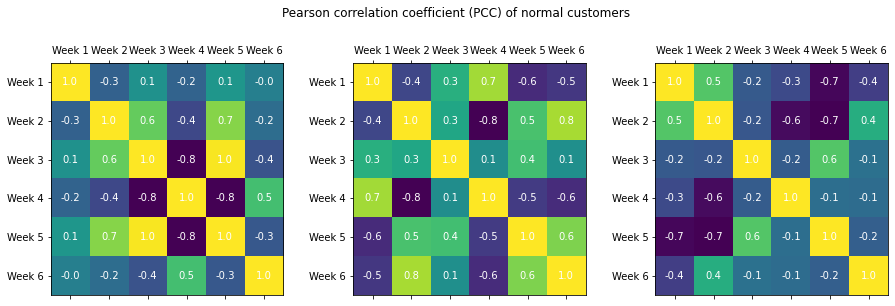

<Figure size 432x288 with 0 Axes>

In [234]:
# 2D data plot 
fig5, axs5 = plt.subplots(1, 3, figsize=(15, 5))

fig5.suptitle('Pearson correlation coefficient (PCC) of normal customers')
plt.subplots_adjust(wspace=0.3)

a = []
idx = 31640
for i in range(516, 558, 7):
    a.append(data.iloc[idx, i:i + 7].to_numpy())
cor = pd.DataFrame(a).transpose().corr()
cax = axs5[0].matshow(cor)
for (i, j), z in np.ndenumerate(cor):
    axs5[0].text(j, i, '{:0.1f}'.format(z), ha='center', va='center', color='white')
alpha = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6']
axs5[0].set_xticklabels([''] + alpha)
axs5[0].set_yticklabels([''] + alpha)
# axs5[0].set_title('Thief customer', fontsize=16)

a = []
idx = 31656
for i in range(516, 558, 7):
    a.append(data.iloc[idx, i:i + 7].to_numpy())
cor = pd.DataFrame(a).transpose().corr()
cax = axs5[1].matshow(cor)
for (i, j), z in np.ndenumerate(cor):
    axs5[1].text(j, i, '{:0.1f}'.format(z), ha='center', va='center', color='white')
axs5[1].set_xticklabels([''] + alpha)
axs5[1].set_yticklabels([''] + alpha)
# axs5[1].set_title('Customer with Fraud', fontsize=16)
# plt.close('all')

a = []
idx = 31670
for i in range(516, 558, 7):
    a.append(data.iloc[idx, i:i + 7].to_numpy())
cor = pd.DataFrame(a).transpose().corr()
cax = axs5[2].matshow(cor)
for (i, j), z in np.ndenumerate(cor):
    axs5[2].text(j, i, '{:0.1f}'.format(z), ha='center', va='center', color='white')
axs5[2].set_xticklabels([''] + alpha)
axs5[2].set_yticklabels([''] + alpha)
# axs5[1].set_title('Customer with Fraud', fontsize=16)
# fig5.colorbar(cax)
# plt.close('all')
plt.show()

plt.tight_layout()
fig5.savefig(f"Image/PCC Normal.png", dpi=300)

In [15]:
idx = 31656
i = 516
xx = data.iloc[idx,i:i + 21].values

In [16]:
xx

array([2.11      , 2.65      , 2.36      , 1.47      , 2.91      ,
       1.72      , 4.11138009, 2.03      , 2.41      , 2.55      ,
       2.51      , 1.65      , 1.27      , 1.25      , 2.39      ,
       3.04      , 2.98      , 3.08      , 2.35      , 2.57      ,
       3.26      ])

In [17]:
import statsmodels.api as sm

acorr = sm.tsa.acf(xx)

In [18]:
acorr

array([ 1.        ,  0.02943106,  0.18660379, -0.21863571, -0.11664212,
       -0.07568205, -0.21570265, -0.25196802, -0.02988235,  0.07456575,
        0.13159416,  0.12380525, -0.0871679 ,  0.00968103])

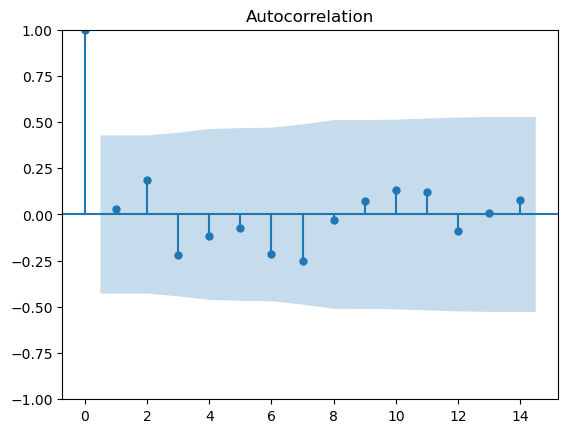

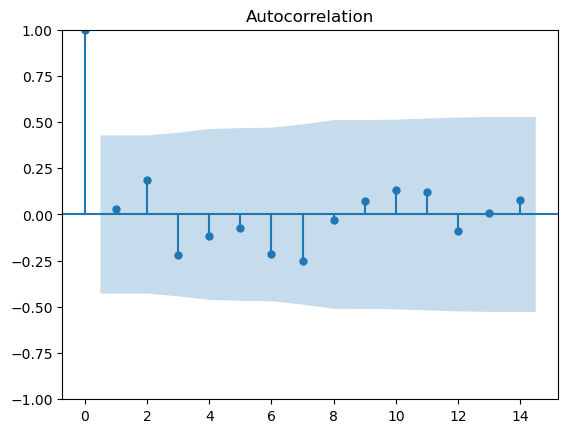

In [21]:
# import the required modules
from statsmodels.graphics.tsaplots import plot_acf
  
plot_acf(xx)

In [23]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")


In [42]:
check_stationarity(data.loc[2]), check_stationarity(data.loc[3]), check_stationarity(data.loc[4])

ADF Statistic: -1.995293
p-value: 0.288641
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
Non-stationary
ADF Statistic: -3.715592
p-value: 0.003899
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
Stationary
ADF Statistic: -2.162228
p-value: 0.220239
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
Non-stationary


(None, None, None)

In [39]:
check_stationarity(data.loc[31640]), check_stationarity(data.loc[31656]), check_stationarity(data.loc[31670])

ADF Statistic: -5.032307
p-value: 0.000019
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
Stationary
ADF Statistic: -6.134114
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
Stationary
ADF Statistic: -5.052959
p-value: 0.000017
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
Stationary


(None, None, None)

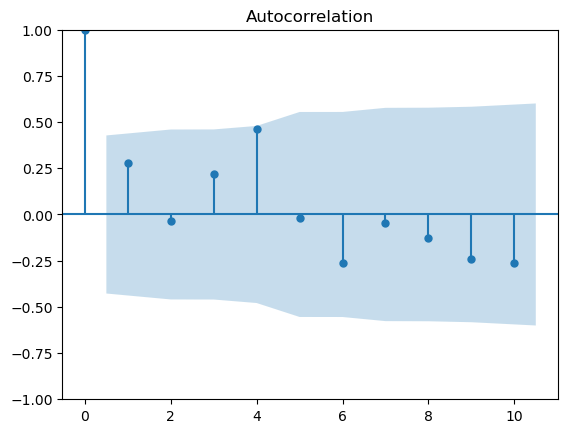

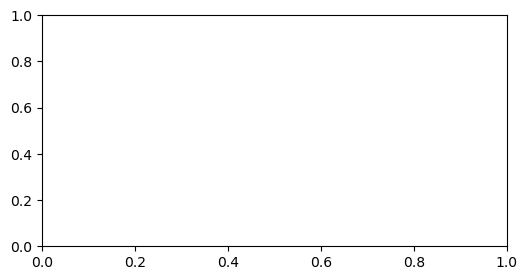

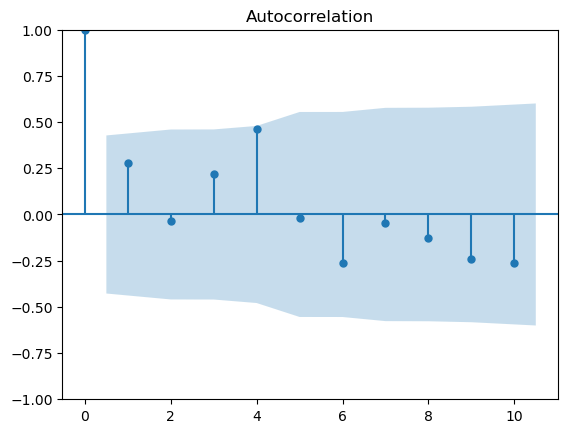

In [46]:
lag_acf = 10
idx = 31670
i = 516

f, ax = plt.subplots(figsize=(6,3))
plot_acf(data.iloc[idx,i:i + 21].values,lags=lag_acf)